In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from math import sin, cos, sqrt, atan2

In [2]:
df = pd.read_csv("../../api/bird_unofficial_api/csv_output.csv")

In [3]:
# Preprocessing and adding date columns
days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
df['datetime'] = df['time_stamp'].apply(lambda x: datetime.fromtimestamp(x))
df['date_string'] = df['datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))
df['week_day'] = df['datetime'].apply(lambda x: days[x.weekday()])

In [4]:
df.head()

,id,latitude,longitude,battery_level,captive,time_stamp,datetime,date_string,week_day
0,efdcb512-0f67-4f87-91b0-22799c2bf265,34.413010,-119.855355,58,False,1550820003,2019-02-21 23:20:03,2019-02-21,thu
1,7c2a13b6-3665-4f48-a974-7da3027b1c10,34.413360,-119.856087,49,False,1550820003,2019-02-21 23:20:03,2019-02-21,thu
2,14552811-dc78-470d-8268-5427383ded9e,34.413730,-119.856170,37,False,1550820003,2019-02-21 23:20:03,2019-02-21,thu
3,b1e03b0f-a1e0-4801-9096-7dcbba49ed64,34.411740,-119.854775,56,False,1550820003,2019-02-21 23:20:03,2019-02-21,thu
4,f7fac8a3-b5d8-4421-ada2-c58990525a80,34.413167,-119.857628,69,False,1550820003,2019-02-21 23:20:03,2019-02-21,thu


In [5]:
df['date_string'].unique()

array(['2019-02-21', '2019-02-25', '2019-02-06', '2019-02-26',
       '2019-02-14', '2019-02-13', '2019-02-28', '2019-02-08',
       '2019-02-22', '2019-02-03', '2019-02-15', '2019-02-05',
       '2019-02-24', '2019-02-16', '2019-02-19', '2019-02-09',
       '2019-02-04', '2019-02-10', '2019-02-20', '2019-02-18',
       '2019-02-12', '2019-02-01', '2019-02-27', '2019-02-23',
       '2019-01-27', '2019-02-17', '2019-01-25', '2019-02-07',
       '2019-01-28', '2019-02-11', '2019-01-24', '2019-03-01'],
      dtype=object)

In [6]:
#Total number of unique birds from ALL data
df['id'].nunique()

2914

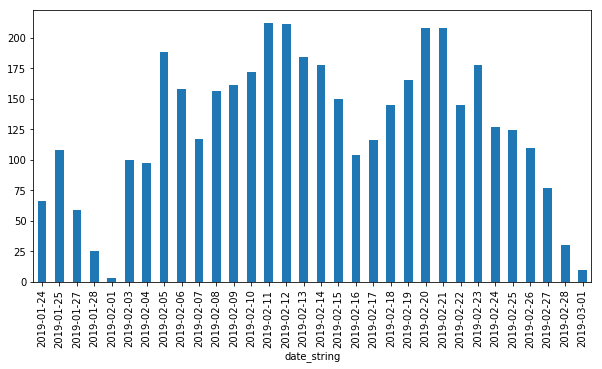

In [7]:
# Distribution of Unique ID's per day
date_df = df.groupby('date_string')['id'].nunique()
date_df.plot(kind='bar',figsize=(10,5))